<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
breast_cancer= pd.read_csv("breast-cancer-wisconsin-data.csv")

In [71]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

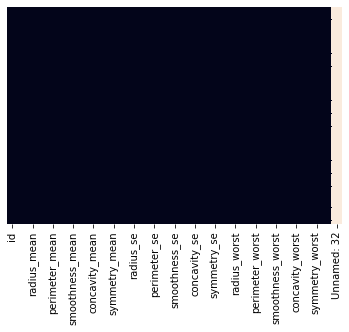

In [72]:
sns.heatmap(breast_cancer.isnull(),yticklabels=False,cbar=False)

In [73]:
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [74]:
breast_cancer.drop(['Unnamed: 32'],axis=1,inplace=True)

In [75]:
#breast_cancer = pd.get_dummies(data=breast_cancer,drop_first=True)

In [76]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
#y[y=='B']=0
#Y[y=='M']=1

In [78]:
diagnosis_map = {
     'B': 0
     , 'M': 1
 }

breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map(diagnosis_map)

In [79]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [80]:
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [107]:
X=breast_cancer.drop(['id','diagnosis'],axis=1)

y=breast_cancer['diagnosis']

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                                    random_state=101)

In [110]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
clf = LogisticRegression(random_state=0,max_iter=10000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [136]:
#Predict train class
predict_ytrain = clf.predict(X_train)
# predicted train probability:
predict_probability_ytrain = clf.predict_proba(X_train)

In [137]:
#Predict test class
predict_ytest = clf.predict(X_test)
# predicted test probability: 
predict_probability_ytest = clf.predict_proba(X_test)

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9973635572950641
Logistic test roc-auc: 0.9805194805194806


In [139]:
predict_probability_ytest[0:5]

array([[9.96108480e-01, 3.89152046e-03],
       [9.83462797e-01, 1.65372027e-02],
       [9.97299897e-01, 2.70010308e-03],
       [1.29780879e-02, 9.87021912e-01],
       [9.99983005e-01, 1.69946384e-05]])

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
accuracy_score(y_train, predict_ytrain)

0.9849246231155779

In [142]:
accuracy_score(y_test, predict_ytest)

0.9766081871345029

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_ytest)
cm

array([[104,   1],
       [  3,  63]])

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [144]:
# ANSWER
cm_df=pd.DataFrame(confusion_matrix(y_test,predict_ytest),index=['is_cancer', 'is_healthy'],columns=['predicted_cancer','predicted_healthy'])
cm_df

,predicted_cancer,predicted_healthy
is_cancer,104,1
is_healthy,3,63


In [145]:
TP=cm_df['predicted_cancer'][0]
TN=cm_df['predicted_healthy'][1]
FP=cm_df['predicted_cancer'][1]
FN=cm_df['predicted_healthy'][0]

#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [146]:
# ANSWER
# use float to perform true division, not integer division
Classification_Accuracy = (TP + TN) / float(TP + TN + FP + FN)
Classification_Accuracy

0.9766081871345029

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [147]:
# ANSWER
Classification_Error=(FP + FN) / float(TP + TN + FP + FN)
Classification_Error

0.023391812865497075

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [166]:
# ANSWER
tpr = TP / float(FN + TP)
tpr

0.9904761904761905

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [167]:
# ANSWER
specificity = TN / (TN + FP)
specificity

0.9545454545454546

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [168]:
# ANSWER
fpr = FP / float(TN + FP)
fpr

0.045454545454545456

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [169]:
# ANSWER
precision = TP / float(TP + FP)
precision

0.9719626168224299

#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [170]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
pd.DataFrame(predict_probability_ytest,columns=['class_0_pp','class_1_pp'])

,class_0_pp,class_1_pp
0,0.996108,0.003892
1,0.983463,0.016537
2,0.997300,0.002700
3,0.012978,0.987022
4,0.999983,0.000017
...,...,...
166,0.994396,0.005604
167,0.979669,0.020331
168,0.999964,0.000036
169,0.335911,0.664089


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [171]:
from sklearn.metrics import roc_curve, auc

No handles with labels found to put in legend.


[array([0.        , 0.        , 0.        , 0.07619048, 0.07619048,
       0.53333333, 0.53333333, 1.        ]), array([0.        , 0.01515152, 0.95454545, 0.95454545, 0.98484848,
       0.98484848, 1.        , 1.        ]), array([2.00000000e+00, 1.00000000e+00, 5.87188545e-01, 2.07390800e-01,
       1.56691365e-01, 2.22266559e-03, 1.87729859e-03, 2.08849702e-07])]
0.9896103896103896


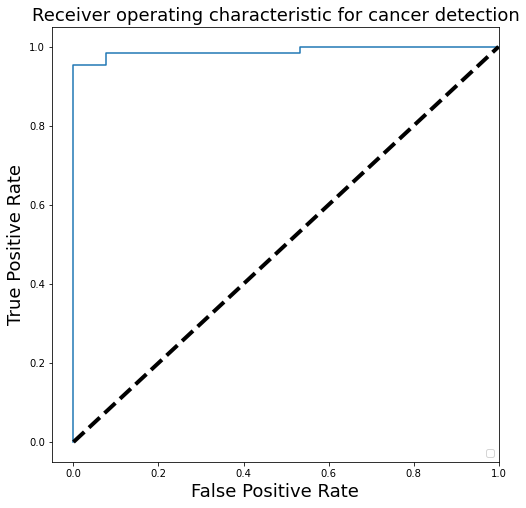

In [173]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# For class 1, find the area under the curve
# Find fpr, tpr

fpr, tpr, thresholds = roc_curve(y_test, predict_probability_ytest[:,1])

print([fpr, tpr, thresholds])
# Find auc
#print(roc_auc_score(y_test,prob_pred_test[:,1],labels=['M']))
#print(roc_auc_score(y_test,y_pred_test,labels=['M','B']))

print(auc(fpr,tpr))

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [196]:

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=[8,8])
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr, tpr, color='orange', label='ROC Curve (area = %0.2f)' % roc_auc,linewidth=4)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Cancer Detection')
    plt.legend()
    plt.show()

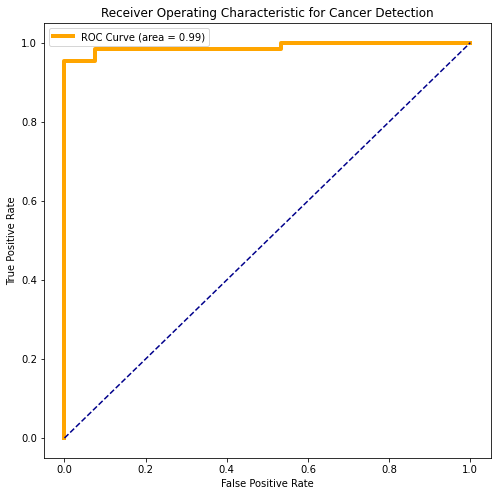

In [197]:
plot_roc_curve(fpr,tpr)

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



